In [1]:
import sys, pathlib
sys.path.append(str(pathlib.Path.cwd().parent))
# sys.path

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import plotly.express as px

In [3]:
%load_ext autoreload
%autoreload 2
%aimport optiml.queries
%matplotlib inline

In [4]:
from optiml.connection import SnowflakeConnConfig
connection = SnowflakeConnConfig(accountname='VUJSGPR-XG91870', warehousename="XSMALL_WH").create_connection()

/Users/skumar/.snowsql/config
Connecting...


In [5]:
from optiml.queries import SNFLKQuery
qlib = SNFLKQuery(connection, 'KIV')

In [6]:
df = qlib.cost_by_usage_type('2022-01-01', '2022-12-31')
df

,WAREHOUSE_GROUP_NAME,TOTAL_CREDITS_USED,TOTAL_DOLLARS_USED
0,Storage,0E-9,1948.223478620758
1,WH Compute,81241.520555609,81241.520555609000


In [7]:
df['TOTAL_CREDITS_USED'] = df['TOTAL_CREDITS_USED'].astype(float)
df['TOTAL_DOLLARS_USED'] = df['TOTAL_DOLLARS_USED'].astype(float)
df.dtypes

WAREHOUSE_GROUP_NAME     object
TOTAL_CREDITS_USED      float64
TOTAL_DOLLARS_USED      float64
dtype: object

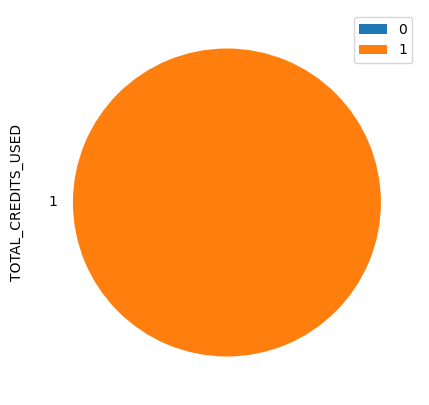

In [9]:
df.plot.pie(y='TOTAL_CREDITS_USED', figsize=(5, 5))
fig = px.pie(df, values='TOTAL_DOLLARS_USED', names='WAREHOUSE_GROUP_NAME', title='Credits Used by Type')

* Largely used by compute
* In 2020 auto clustering was on but was turned off - why?
* Storage credits at 0 since storage is charged as a flat rate - are numbers consistent?
* Definitely did not use $80K worth of credits in October since total bill is $50K - so something is wrong!


In [7]:
qlib.cost_by_user_ts('2022-01-01', '2022-12-31')

,USER_NAME,WAREHOUSE_GROUP_NAME,CREDITS_USED,CUMULATIVE_CREDITS_TOTAL,START_TIME,END_TIME
0,USER,Auto Clustering,0.017153673,0.017153673,2020-05-13 23:00:00-07:00,2020-05-14 00:00:00-07:00
1,USER,Auto Clustering,0.002138804,0.019292477,2020-05-14 01:00:00-07:00,2020-05-14 02:00:00-07:00
2,USER,Auto Clustering,0.000392205,0.019684682,2020-05-14 02:00:00-07:00,2020-05-14 03:00:00-07:00
3,USER,Auto Clustering,0.000553646,0.020238328,2020-05-14 04:00:00-07:00,2020-05-14 05:00:00-07:00
4,USER,Auto Clustering,0.000468686,0.020707014,2020-05-14 05:00:00-07:00,2020-05-14 06:00:00-07:00
...,...,...,...,...,...,...
47569,VERTEX_PROD,WH Compute,3.162718334,113078.835138905,2022-10-12 17:00:00-07:00,2022-10-12 18:00:00-07:00
47570,DBT_DEV,WH Compute,1.030006111,113078.835138905,2022-10-12 17:00:00-07:00,2022-10-12 18:00:00-07:00
47571,GREGORYW,WH Compute,4.300761945,113078.835138905,2022-10-12 17:00:00-07:00,2022-10-12 18:00:00-07:00
47572,None,WH Compute,2.139133889,113078.835138905,2022-10-12 17:00:00-07:00,2022-10-12 18:00:00-07:00
